In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Persian'

/content/drive/MyDrive/Colab Notebooks/Persian


# نصب پکیج های مورد نیاز

In [ ]:
!pip install pandas==0.24.2 matplotlib==3.1.0 scikit-learn==0.24.2 numpy==1.16.4

# خواندن دیتاست

In [ ]:
import pandas as pd 

test  = pd.read_csv('test_persian.csv')
train = pd.read_csv('train_persian.csv')

# نمایش ابعاد دیتاست و 5 سطر اول آن

In [ ]:
print(train.shape)
print(test.shape)
train.head()

(15000, 1025)
(1000, 1024)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel984,pixel985,pixel986,pixel987,pixel988,pixel989,pixel990,pixel991,pixel992,pixel993,pixel994,pixel995,pixel996,pixel997,pixel998,pixel999,pixel1000,pixel1001,pixel1002,pixel1003,pixel1004,pixel1005,pixel1006,pixel1007,pixel1008,pixel1009,pixel1010,pixel1011,pixel1012,pixel1013,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# تمیز کردن داده ها 

In [ ]:
print("train before : " , train.shape)
print("test before : " , test.shape)
df1 = train[train.isna().any(axis=1)]
print(df1)
train = train.dropna()
test = test.dropna()
print("train after : " , train.shape)
print("test after : " , test.shape)

train before :  (15000, 1025)
test before :  (1000, 1024)
Empty DataFrame
Columns: [label, pixel0, pixel1, pixel2, pixel3, pixel4, pixel5, pixel6, pixel7, pixel8, pixel9, pixel10, pixel11, pixel12, pixel13, pixel14, pixel15, pixel16, pixel17, pixel18, pixel19, pixel20, pixel21, pixel22, pixel23, pixel24, pixel25, pixel26, pixel27, pixel28, pixel29, pixel30, pixel31, pixel32, pixel33, pixel34, pixel35, pixel36, pixel37, pixel38, pixel39, pixel40, pixel41, pixel42, pixel43, pixel44, pixel45, pixel46, pixel47, pixel48, pixel49, pixel50, pixel51, pixel52, pixel53, pixel54, pixel55, pixel56, pixel57, pixel58, pixel59, pixel60, pixel61, pixel62, pixel63, pixel64, pixel65, pixel66, pixel67, pixel68, pixel69, pixel70, pixel71, pixel72, pixel73, pixel74, pixel75, pixel76, pixel77, pixel78, pixel79, pixel80, pixel81, pixel82, pixel83, pixel84, pixel85, pixel86, pixel87, pixel88, pixel89, pixel90, pixel91, pixel92, pixel93, pixel94, pixel95, pixel96, pixel97, pixel98, ...]
Index: []

[0 rows x 10

# نمایش پراکندگی ارقام

Text(0, 0.5, 'Frequency')

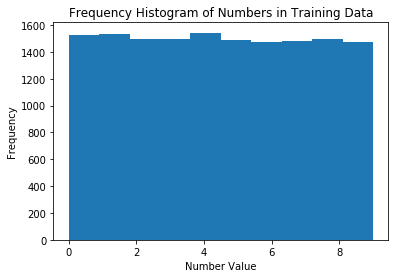

In [ ]:
import matplotlib.pyplot as plt
plt.hist(train["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")

# نمایش 25 تصویر اول

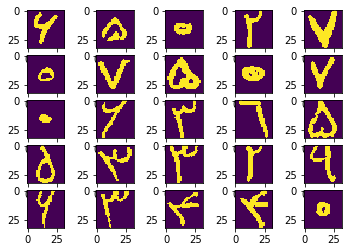

In [ ]:
import math
 
f, ax = plt.subplots(5, 5)

for i in range(0,25):
    data = train.iloc[i,1:1025].values
    nrows, ncols = 32, 32
    grid = data.reshape((nrows, ncols))
    row = i/5
    col = i%5
    ax[int(row),col].imshow(grid)

# train نمایش تصویر از دیتاست 

enter image id : 2


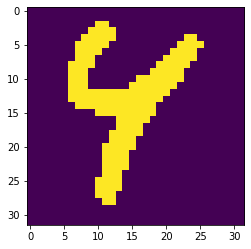

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
inp = int(input("enter image id : "))
data = train.iloc[inp-2,1:1024].values
data = np.append(data , [0])
nrows, ncols = 32,32
grid = data.reshape((nrows, ncols))
plt.imshow(grid)

# test نمایش تصویر از دیتاست

enter image id : 7
(1024,)


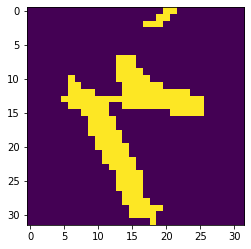

In [ ]:
import math
import matplotlib.pyplot as plt
inp = int(input("enter image id : "))
data = test.iloc[inp-2,0:1024].values 
print(data.shape)
grid = data.reshape((32,32))
plt.imshow(grid)

# PCA توزیع پذیری ارقام براساس 

(15000, 1025)
(15000, 1024)


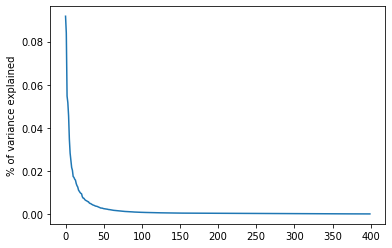

In [ ]:
from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=400)
print(train.shape)
train_wl = train.drop('label', axis=1)
print(train_wl.shape)
pca.fit(train_wl)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')

pca = decomposition.PCA(n_components=100)
pca.fit(train.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(train.drop('label', axis=1)))
PCtrain['label'] = train['label']

PCtest = pd.DataFrame(pca.transform(test))

# نمایش سه بعدی پراکندگی داده ها بر اساس
# pc1 , pc2 , pc3

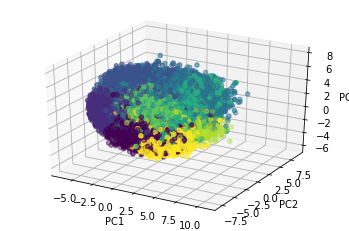

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =PCtrain[0]
y =PCtrain[1]
z =PCtrain[2]

colors = [int(i % 9) for i in PCtrain['label']]
ax.scatter(x, y, z, c=colors, marker='o', label=colors)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

# MLP اجرای الگوریتم  

In [ ]:
from sklearn.neural_network import MLPClassifier
y = PCtrain['label'][0:7500]
X=PCtrain.drop('label', axis=1)[0:7500]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3500,), random_state=1)
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3500,), random_state=1,
              solver='lbfgs')

# نمایش معیار ها و ماتریس آشفتگی

In [ ]:
from sklearn import  metrics

predicted = clf.predict(PCtrain.drop('label', axis=1)[7500:15000])
expected = PCtrain['label'][7500:15000]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3500,), random_state=1,
              solver='lbfgs'):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       769
           1       0.97      0.99      0.98       770
           2       0.96      0.95      0.96       747
           3       0.95      0.96      0.95       739
           4       0.96      0.94      0.95       771
           5       0.99      0.97      0.98       720
           6       0.97      0.96      0.96       770
           7       0.98      0.99      0.98       722
           8       0.98      0.99      0.99       747
           9       0.97      0.98      0.97       745

    accuracy                           0.97      7500
   macro avg       0.97      0.97      0.97      7500
weighted avg       0.97      0.97      0.97      7500


Confusion matrix:
[[764   0   0   0   0   3   0   0   2   0]
 [  1 760   1   0   1   0   3   0   0   

# گرفتن خروجی نهایی

In [ ]:
output = pd.DataFrame(clf.predict(PCtest), columns =['Label'])
output.reset_index(inplace=True)
output.rename(columns={'index': 'ImageId'}, inplace=True)
output['ImageId']=output['ImageId']+1
output.to_csv('output_persian.csv', index=False)